In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.boll_channel_cci_strategy import BollChannelCciStrategy
from datetime import datetime

2019-10-23 11:24:32.756067	开始加载历史数据
2019-10-23 11:24:32.757068	加载进度：###### [61%]
2019-10-23 11:24:32.758067	加载进度：########## [100%]
2019-10-23 11:24:32.758067	历史数据加载完成，数据量：68649
2019-10-23 11:24:32.765068	策略初始化完成
2019-10-23 11:24:32.766068	开始回放历史数据
2019-10-23 11:24:33.498099	历史数据回放结束
2019-10-23 11:24:33.499101	开始计算逐日盯市盈亏
2019-10-23 11:24:33.501100	逐日盯市盈亏计算完成
2019-10-23 11:24:33.501100	开始计算策略统计指标
2019-10-23 11:24:33.508100	------------------------------
2019-10-23 11:24:33.508100	首个交易日：	2019-09-02
2019-10-23 11:24:33.508100	最后交易日：	2019-10-20
2019-10-23 11:24:33.508100	总交易日：	49
2019-10-23 11:24:33.508100	盈利交易日：	17
2019-10-23 11:24:33.508100	亏损交易日：	23
2019-10-23 11:24:33.508100	起始资金：	200,000.00
2019-10-23 11:24:33.508100	结束资金：	238,767.64
2019-10-23 11:24:33.509101	总收益率：	19.38%
2019-10-23 11:24:33.509101	年化收益：	94.94%
2019-10-23 11:24:33.509101	最大回撤: 	-14,310.13
2019-10-23 11:24:33.509101	百分比最大回撤: -5.67%
2019-10-23 11:24:33.509101	总盈亏：	38,767.64
2019-10-23 11:24:33.509101	总手续费：	0.00
2019-10-

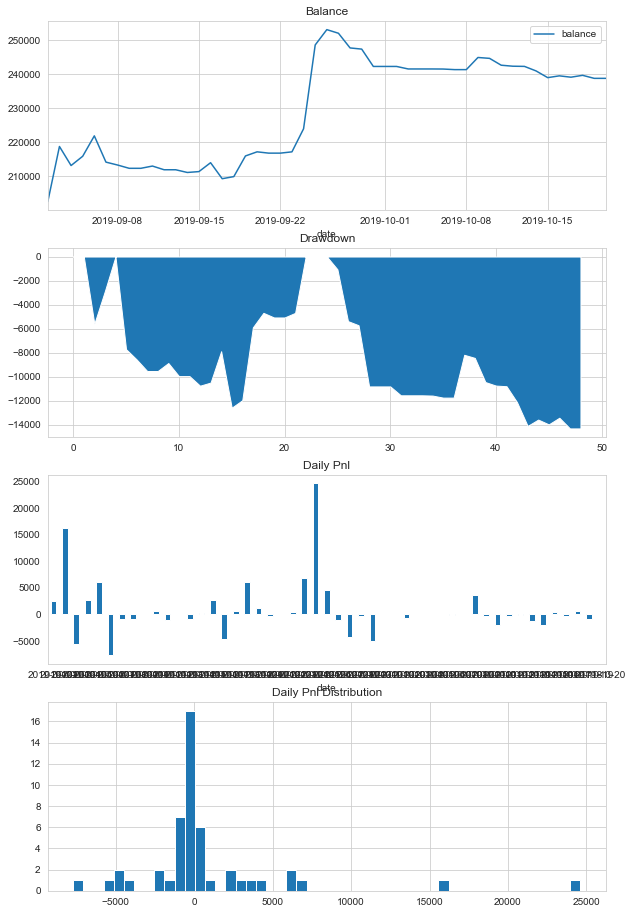

In [17]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="BTCUSDT.OKEX",
    interval="1m",
    start=datetime(2019, 9, 1),
    end=datetime(2019, 10, 20),
    rate=0.0,
    slippage=0.0,
    size=1,
    pricetick=0.01,
    capital=200_000,
)

BollChannelCciStrategy.boll_window = 19
BollChannelCciStrategy.boll_dev = 7
BollChannelCciStrategy.cci_window = 30
BollChannelCciStrategy.atr_window = 35
BollChannelCciStrategy.sl_multiplier = 11

engine.add_strategy(BollChannelCciStrategy, {})

#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics();
engine.show_chart()

In [3]:
setting = OptimizationSetting()
setting.set_target("total_return")

setting.add_parameter("boll_window", 5, 40, 2)
setting.add_parameter("boll_dev", 5, 40, 2)
setting.add_parameter("cci_window", 4, 40, 2)
setting.add_parameter("atr_window", 2, 40, 2)
setting.add_parameter("sl_multiplier", 1, 15, 1)

engine.run_ga_optimization(setting, population_size=20, ngen_size=1000)

2019-10-23 10:55:34.159289	参数优化空间：1231200
2019-10-23 10:55:34.160293	每代族群总数：20
2019-10-23 10:55:34.160293	优良筛选个数：16
2019-10-23 10:55:34.160293	迭代次数：1000
2019-10-23 10:55:34.160293	交叉概率：95%
2019-10-23 10:55:34.160293	突变概率：5%
2019-10-23 10:55:34.160293	开始加载历史数据
2019-10-23 10:55:34.160293	加载进度：###### [61%]
2019-10-23 10:55:34.161292	加载进度：########## [100%]
2019-10-23 10:55:34.161292	历史数据加载完成，数据量：68649
2019-10-23 10:55:34.167290	策略初始化完成
2019-10-23 10:55:34.168291	开始回放历史数据
2019-10-23 10:55:34.860324	历史数据回放结束
2019-10-23 10:55:34.860324	开始计算逐日盯市盈亏
2019-10-23 10:55:34.862293	逐日盯市盈亏计算完成
2019-10-23 10:55:34.862293	开始计算策略统计指标
2019-10-23 10:55:34.869293	开始加载历史数据
2019-10-23 10:55:34.870292	加载进度：###### [61%]
2019-10-23 10:55:34.871293	加载进度：########## [100%]
2019-10-23 10:55:34.871293	历史数据加载完成，数据量：68649
2019-10-23 10:55:34.877292	策略初始化完成
2019-10-23 10:55:34.878290	开始回放历史数据
2019-10-23 10:55:35.577322	历史数据回放结束
2019-10-23 10:55:35.577322	开始计算逐日盯市盈亏
2019-10-23 10:55:35.579293	逐日盯市盈亏计算完成
2019-10-23 10:55:3

2019-10-23 10:55:49.001119	历史数据回放结束
2019-10-23 10:55:49.001119	开始计算逐日盯市盈亏
2019-10-23 10:55:49.003116	逐日盯市盈亏计算完成
2019-10-23 10:55:49.003116	开始计算策略统计指标
2019-10-23 10:55:49.010121	开始加载历史数据
2019-10-23 10:55:49.011121	加载进度：###### [61%]
2019-10-23 10:55:49.012150	加载进度：########## [100%]
2019-10-23 10:55:49.012150	历史数据加载完成，数据量：68649
2019-10-23 10:55:49.018119	策略初始化完成
2019-10-23 10:55:49.019122	开始回放历史数据
2019-10-23 10:55:49.719118	历史数据回放结束
2019-10-23 10:55:49.720119	开始计算逐日盯市盈亏
2019-10-23 10:55:49.720119	成交记录为空，无法计算
2019-10-23 10:55:49.721117	开始计算策略统计指标
2019-10-23 10:55:49.721117	开始加载历史数据
2019-10-23 10:55:49.722118	加载进度：###### [61%]
2019-10-23 10:55:49.723118	加载进度：########## [100%]
2019-10-23 10:55:49.723118	历史数据加载完成，数据量：68649
2019-10-23 10:55:49.729118	策略初始化完成
2019-10-23 10:55:49.729118	开始回放历史数据
2019-10-23 10:55:50.414278	历史数据回放结束
2019-10-23 10:55:50.414278	开始计算逐日盯市盈亏
2019-10-23 10:55:50.416275	逐日盯市盈亏计算完成
2019-10-23 10:55:50.416275	开始计算策略统计指标
2019-10-23 10:55:50.423275	开始加载历史数据
2019-10-23 10:55:

2019-10-23 10:56:04.215695	历史数据回放结束
2019-10-23 10:56:04.215695	开始计算逐日盯市盈亏
2019-10-23 10:56:04.218696	逐日盯市盈亏计算完成
2019-10-23 10:56:04.218696	开始计算策略统计指标
2019-10-23 10:56:04.225696	开始加载历史数据
2019-10-23 10:56:04.226696	加载进度：###### [61%]
2019-10-23 10:56:04.227725	加载进度：########## [100%]
2019-10-23 10:56:04.227725	历史数据加载完成，数据量：68649
2019-10-23 10:56:04.232694	策略初始化完成
2019-10-23 10:56:04.233693	开始回放历史数据
2019-10-23 10:56:04.942695	历史数据回放结束
2019-10-23 10:56:04.942695	开始计算逐日盯市盈亏
2019-10-23 10:56:04.945695	逐日盯市盈亏计算完成
2019-10-23 10:56:04.945695	开始计算策略统计指标
2019-10-23 10:56:04.951694	开始加载历史数据
2019-10-23 10:56:04.952693	加载进度：###### [61%]
2019-10-23 10:56:04.953695	加载进度：########## [100%]
2019-10-23 10:56:04.953695	历史数据加载完成，数据量：68649
2019-10-23 10:56:04.959724	策略初始化完成
2019-10-23 10:56:04.959724	开始回放历史数据
2019-10-23 10:56:05.649696	历史数据回放结束
2019-10-23 10:56:05.649696	开始计算逐日盯市盈亏
2019-10-23 10:56:05.651695	逐日盯市盈亏计算完成
2019-10-23 10:56:05.652728	开始计算策略统计指标
2019-10-23 10:56:05.658728	开始加载历史数据
2019-10-23 10:56:0

2019-10-23 10:56:19.888283	历史数据回放结束
2019-10-23 10:56:19.889285	开始计算逐日盯市盈亏
2019-10-23 10:56:19.892284	逐日盯市盈亏计算完成
2019-10-23 10:56:19.892284	开始计算策略统计指标
2019-10-23 10:56:19.899284	开始加载历史数据
2019-10-23 10:56:19.900285	加载进度：###### [61%]
2019-10-23 10:56:19.900285	加载进度：########## [100%]
2019-10-23 10:56:19.900285	历史数据加载完成，数据量：68649
2019-10-23 10:56:19.906281	策略初始化完成
2019-10-23 10:56:19.907320	开始回放历史数据
2019-10-23 10:56:20.606284	历史数据回放结束
2019-10-23 10:56:20.606284	开始计算逐日盯市盈亏
2019-10-23 10:56:20.609283	逐日盯市盈亏计算完成
2019-10-23 10:56:20.609283	开始计算策略统计指标
2019-10-23 10:56:20.616284	开始加载历史数据
2019-10-23 10:56:20.616284	加载进度：###### [61%]
2019-10-23 10:56:20.617311	加载进度：########## [100%]
2019-10-23 10:56:20.617311	历史数据加载完成，数据量：68649
2019-10-23 10:56:20.623283	策略初始化完成
2019-10-23 10:56:20.623283	开始回放历史数据
2019-10-23 10:56:21.317317	历史数据回放结束
2019-10-23 10:56:21.317317	开始计算逐日盯市盈亏
2019-10-23 10:56:21.319288	逐日盯市盈亏计算完成
2019-10-23 10:56:21.320283	开始计算策略统计指标
2019-10-23 10:56:21.327285	开始加载历史数据
2019-10-23 10:56:2

2019-10-23 10:56:35.442196	历史数据回放结束
2019-10-23 10:56:35.442196	开始计算逐日盯市盈亏
2019-10-23 10:56:35.445170	逐日盯市盈亏计算完成
2019-10-23 10:56:35.445170	开始计算策略统计指标
2019-10-23 10:56:35.452187	开始加载历史数据
2019-10-23 10:56:35.453188	加载进度：###### [61%]
2019-10-23 10:56:35.453188	加载进度：########## [100%]
2019-10-23 10:56:35.453188	历史数据加载完成，数据量：68649
2019-10-23 10:56:35.459162	策略初始化完成
2019-10-23 10:56:35.460161	开始回放历史数据
2019-10-23 10:56:36.148191	历史数据回放结束
2019-10-23 10:56:36.148191	开始计算逐日盯市盈亏
2019-10-23 10:56:36.151164	逐日盯市盈亏计算完成
2019-10-23 10:56:36.151164	开始计算策略统计指标
4  	20    	[8.45794317]	[0.66074329]	[7.35321868]	[9.85710593]
2019-10-23 10:56:36.161160	开始加载历史数据
2019-10-23 10:56:36.161160	加载进度：###### [61%]
2019-10-23 10:56:36.162161	加载进度：########## [100%]
2019-10-23 10:56:36.162161	历史数据加载完成，数据量：68649
2019-10-23 10:56:36.168162	策略初始化完成
2019-10-23 10:56:36.168162	开始回放历史数据
2019-10-23 10:56:36.873161	历史数据回放结束
2019-10-23 10:56:36.874162	开始计算逐日盯市盈亏
2019-10-23 10:56:36.874162	成交记录为空，无法计算
2019-10-23 10:56:36.874162	开

2019-10-23 10:56:50.679180	历史数据回放结束
2019-10-23 10:56:50.679180	开始计算逐日盯市盈亏
2019-10-23 10:56:50.682180	逐日盯市盈亏计算完成
2019-10-23 10:56:50.683179	开始计算策略统计指标
7  	20    	[9.6231579] 	[0.38930336]	[9.39285059]	[10.53892606]
2019-10-23 10:56:50.693178	开始加载历史数据
2019-10-23 10:56:50.694180	加载进度：###### [61%]
2019-10-23 10:56:50.695181	加载进度：########## [100%]
2019-10-23 10:56:50.695181	历史数据加载完成，数据量：68649
2019-10-23 10:56:50.701178	策略初始化完成
2019-10-23 10:56:50.702179	开始回放历史数据
2019-10-23 10:56:51.393210	历史数据回放结束
2019-10-23 10:56:51.393210	开始计算逐日盯市盈亏
2019-10-23 10:56:51.393210	成交记录为空，无法计算
2019-10-23 10:56:51.393210	开始计算策略统计指标
2019-10-23 10:56:51.393210	开始加载历史数据
2019-10-23 10:56:51.394181	加载进度：###### [61%]
2019-10-23 10:56:51.394181	加载进度：########## [100%]
2019-10-23 10:56:51.394181	历史数据加载完成，数据量：68649
2019-10-23 10:56:51.401177	策略初始化完成
2019-10-23 10:56:51.401177	开始回放历史数据
2019-10-23 10:56:52.080132	历史数据回放结束
2019-10-23 10:56:52.080132	开始计算逐日盯市盈亏
2019-10-23 10:56:52.081132	成交记录为空，无法计算
2019-10-23 10:56:52.081132

2019-10-23 10:57:04.759331	历史数据回放结束
2019-10-23 10:57:04.759331	开始计算逐日盯市盈亏
2019-10-23 10:57:04.762302	逐日盯市盈亏计算完成
2019-10-23 10:57:04.762302	开始计算策略统计指标
2019-10-23 10:57:04.769298	开始加载历史数据
2019-10-23 10:57:04.770334	加载进度：###### [61%]
2019-10-23 10:57:04.770334	加载进度：########## [100%]
2019-10-23 10:57:04.770334	历史数据加载完成，数据量：68649
2019-10-23 10:57:04.776298	策略初始化完成
2019-10-23 10:57:04.776298	开始回放历史数据
2019-10-23 10:57:05.467329	历史数据回放结束
2019-10-23 10:57:05.468335	开始计算逐日盯市盈亏
2019-10-23 10:57:05.470302	逐日盯市盈亏计算完成
2019-10-23 10:57:05.470302	开始计算策略统计指标
19 	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
2019-10-23 10:57:05.480332	开始加载历史数据
2019-10-23 10:57:05.480332	加载进度：###### [61%]
2019-10-23 10:57:05.481302	加载进度：########## [100%]
2019-10-23 10:57:05.481302	历史数据加载完成，数据量：68649
2019-10-23 10:57:05.487300	策略初始化完成
2019-10-23 10:57:05.488301	开始回放历史数据
2019-10-23 10:57:06.194298	历史数据回放结束
2019-10-23 10:57:06.194298	开始计算逐日盯市盈亏
2019-10-23 10:57:06.195299	成交记录为空，无法计算
2019-10-23 10:57:06.19529

2019-10-23 10:57:18.130589	历史数据回放结束
2019-10-23 10:57:18.130589	开始计算逐日盯市盈亏
2019-10-23 10:57:18.130589	成交记录为空，无法计算
2019-10-23 10:57:18.130589	开始计算策略统计指标
38 	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
2019-10-23 10:57:18.132590	开始加载历史数据
2019-10-23 10:57:18.133591	加载进度：###### [61%]
2019-10-23 10:57:18.133591	加载进度：########## [100%]
2019-10-23 10:57:18.133591	历史数据加载完成，数据量：68649
2019-10-23 10:57:18.139556	策略初始化完成
2019-10-23 10:57:18.140555	开始回放历史数据
2019-10-23 10:57:18.853588	历史数据回放结束
2019-10-23 10:57:18.853588	开始计算逐日盯市盈亏
2019-10-23 10:57:18.853588	成交记录为空，无法计算
2019-10-23 10:57:18.853588	开始计算策略统计指标
39 	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
40 	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
41 	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
2019-10-23 10:57:18.860581	开始加载历史数据
2019-10-23 10:57:18.860581	加载进度：###### [61%]
2019-10-23 10:57:18.861582	加载进度：########## [100%]
2019-10-23 10:57:18.861582	历史数据加载完成，数据量：68649
2019-10-2

2019-10-23 10:57:30.969554	历史数据回放结束
2019-10-23 10:57:30.969554	开始计算逐日盯市盈亏
2019-10-23 10:57:30.972556	逐日盯市盈亏计算完成
2019-10-23 10:57:30.972556	开始计算策略统计指标
2019-10-23 10:57:30.980555	开始加载历史数据
2019-10-23 10:57:30.980555	加载进度：###### [61%]
2019-10-23 10:57:30.981555	加载进度：########## [100%]
2019-10-23 10:57:30.981555	历史数据加载完成，数据量：68649
2019-10-23 10:57:30.987555	策略初始化完成
2019-10-23 10:57:30.987555	开始回放历史数据
2019-10-23 10:57:31.687199	历史数据回放结束
2019-10-23 10:57:31.687199	开始计算逐日盯市盈亏
2019-10-23 10:57:31.689169	逐日盯市盈亏计算完成
2019-10-23 10:57:31.689169	开始计算策略统计指标
54 	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
55 	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
2019-10-23 10:57:31.702199	开始加载历史数据
2019-10-23 10:57:31.702199	加载进度：###### [61%]
2019-10-23 10:57:31.703199	加载进度：########## [100%]
2019-10-23 10:57:31.703199	历史数据加载完成，数据量：68649
2019-10-23 10:57:31.709168	策略初始化完成
2019-10-23 10:57:31.710166	开始回放历史数据
2019-10-23 10:57:32.400204	历史数据回放结束
2019-10-23 10:57:32.400204	开始计算逐日盯市盈

d:\work\vnpy\vnpy\app\cta_strategy\backtesting.py:418: RuntimeWarning: divide by zero encountered in double_scalars
  return_drawdown_ratio = -total_return / max_ddpercent


2019-10-23 10:57:41.746299	历史数据回放结束
2019-10-23 10:57:41.746299	开始计算逐日盯市盈亏
2019-10-23 10:57:41.746299	成交记录为空，无法计算
2019-10-23 10:57:41.746299	开始计算策略统计指标
70 	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
2019-10-23 10:57:41.749298	开始加载历史数据
2019-10-23 10:57:41.749298	加载进度：###### [61%]
2019-10-23 10:57:41.750299	加载进度：########## [100%]
2019-10-23 10:57:41.750299	历史数据加载完成，数据量：68649
2019-10-23 10:57:41.756297	策略初始化完成
2019-10-23 10:57:41.757299	开始回放历史数据
2019-10-23 10:57:42.478299	历史数据回放结束
2019-10-23 10:57:42.478299	开始计算逐日盯市盈亏
2019-10-23 10:57:42.481299	逐日盯市盈亏计算完成
2019-10-23 10:57:42.481299	开始计算策略统计指标
71 	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
72 	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
2019-10-23 10:57:42.492816	开始加载历史数据
2019-10-23 10:57:42.492816	加载进度：###### [61%]
2019-10-23 10:57:42.493818	加载进度：########## [100%]
2019-10-23 10:57:42.493818	历史数据加载完成，数据量：68649
2019-10-23 10:57:42.499815	策略初始化完成
2019-10-23 10:57:42.499815	开始回放历史数据
2019-

2019-10-23 10:57:54.158978	历史数据回放结束
2019-10-23 10:57:54.158978	开始计算逐日盯市盈亏
2019-10-23 10:57:54.161979	逐日盯市盈亏计算完成
2019-10-23 10:57:54.161979	开始计算策略统计指标
2019-10-23 10:57:54.168977	开始加载历史数据
2019-10-23 10:57:54.169977	加载进度：###### [61%]
2019-10-23 10:57:54.170978	加载进度：########## [100%]
2019-10-23 10:57:54.171977	历史数据加载完成，数据量：68649
2019-10-23 10:57:54.177975	策略初始化完成
2019-10-23 10:57:54.177975	开始回放历史数据
2019-10-23 10:57:54.892977	历史数据回放结束
2019-10-23 10:57:54.892977	开始计算逐日盯市盈亏
2019-10-23 10:57:54.892977	成交记录为空，无法计算
2019-10-23 10:57:54.892977	开始计算策略统计指标
98 	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
2019-10-23 10:57:54.894976	开始加载历史数据
2019-10-23 10:57:54.895977	加载进度：###### [61%]
2019-10-23 10:57:54.896976	加载进度：########## [100%]
2019-10-23 10:57:54.896976	历史数据加载完成，数据量：68649
2019-10-23 10:57:54.903975	策略初始化完成
2019-10-23 10:57:54.903975	开始回放历史数据
2019-10-23 10:57:55.594975	历史数据回放结束
2019-10-23 10:57:55.594975	开始计算逐日盯市盈亏
2019-10-23 10:57:55.597975	逐日盯市盈亏计算完成
2019-10-23 10:57:55.59797

2019-10-23 10:58:08.481441	历史数据回放结束
2019-10-23 10:58:08.481441	开始计算逐日盯市盈亏
2019-10-23 10:58:08.481441	成交记录为空，无法计算
2019-10-23 10:58:08.481441	开始计算策略统计指标
114	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
115	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
2019-10-23 10:58:08.486439	开始加载历史数据
2019-10-23 10:58:08.486439	加载进度：###### [61%]
2019-10-23 10:58:08.487439	加载进度：########## [100%]
2019-10-23 10:58:08.487439	历史数据加载完成，数据量：68649
2019-10-23 10:58:08.493442	策略初始化完成
2019-10-23 10:58:08.494440	开始回放历史数据
2019-10-23 10:58:09.220476	历史数据回放结束
2019-10-23 10:58:09.220476	开始计算逐日盯市盈亏
2019-10-23 10:58:09.220476	成交记录为空，无法计算
2019-10-23 10:58:09.220476	开始计算策略统计指标
2019-10-23 10:58:09.220476	开始加载历史数据
2019-10-23 10:58:09.221441	加载进度：###### [61%]
2019-10-23 10:58:09.222440	加载进度：########## [100%]
2019-10-23 10:58:09.222440	历史数据加载完成，数据量：68649
2019-10-23 10:58:09.228438	策略初始化完成
2019-10-23 10:58:09.228438	开始回放历史数据
2019-10-23 10:58:09.958441	历史数据回放结束
2019-10-23 10:58:09.958441	开始计算逐日盯

2019-10-23 10:58:22.106135	历史数据回放结束
2019-10-23 10:58:22.106135	开始计算逐日盯市盈亏
2019-10-23 10:58:22.108132	逐日盯市盈亏计算完成
2019-10-23 10:58:22.108132	开始计算策略统计指标
2019-10-23 10:58:22.116132	开始加载历史数据
2019-10-23 10:58:22.116132	加载进度：###### [61%]
2019-10-23 10:58:22.117132	加载进度：########## [100%]
2019-10-23 10:58:22.117132	历史数据加载完成，数据量：68649
2019-10-23 10:58:22.123133	策略初始化完成
2019-10-23 10:58:22.124132	开始回放历史数据
2019-10-23 10:58:22.832131	历史数据回放结束
2019-10-23 10:58:22.832131	开始计算逐日盯市盈亏
2019-10-23 10:58:22.832131	成交记录为空，无法计算
2019-10-23 10:58:22.832131	开始计算策略统计指标
133	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
2019-10-23 10:58:22.835132	开始加载历史数据
2019-10-23 10:58:22.836134	加载进度：###### [61%]
2019-10-23 10:58:22.836134	加载进度：########## [100%]
2019-10-23 10:58:22.836134	历史数据加载完成，数据量：68649
2019-10-23 10:58:22.842131	策略初始化完成
2019-10-23 10:58:22.842131	开始回放历史数据
2019-10-23 10:58:23.549132	历史数据回放结束
2019-10-23 10:58:23.550133	开始计算逐日盯市盈亏
2019-10-23 10:58:23.552133	逐日盯市盈亏计算完成
2019-10-23 10:58:23.55213

2019-10-23 10:58:35.351412	历史数据回放结束
2019-10-23 10:58:35.351412	开始计算逐日盯市盈亏
2019-10-23 10:58:35.354423	逐日盯市盈亏计算完成
2019-10-23 10:58:35.354423	开始计算策略统计指标
154	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
2019-10-23 10:58:35.364383	开始加载历史数据
2019-10-23 10:58:35.365384	加载进度：###### [61%]
2019-10-23 10:58:35.366383	加载进度：########## [100%]
2019-10-23 10:58:35.366383	历史数据加载完成，数据量：68649
2019-10-23 10:58:35.372380	策略初始化完成
2019-10-23 10:58:35.372380	开始回放历史数据
2019-10-23 10:58:36.108414	历史数据回放结束
2019-10-23 10:58:36.109416	开始计算逐日盯市盈亏
2019-10-23 10:58:36.111417	逐日盯市盈亏计算完成
2019-10-23 10:58:36.111417	开始计算策略统计指标
155	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
2019-10-23 10:58:36.121381	开始加载历史数据
2019-10-23 10:58:36.122383	加载进度：###### [61%]
2019-10-23 10:58:36.123383	加载进度：########## [100%]
2019-10-23 10:58:36.123383	历史数据加载完成，数据量：68649
2019-10-23 10:58:36.128380	策略初始化完成
2019-10-23 10:58:36.129380	开始回放历史数据
2019-10-23 10:58:36.828383	历史数据回放结束
2019-10-23 10:58:36.828383	开始计算逐日盯市盈

2019-10-23 10:58:48.885308	历史数据回放结束
2019-10-23 10:58:48.886309	开始计算逐日盯市盈亏
2019-10-23 10:58:48.888309	逐日盯市盈亏计算完成
2019-10-23 10:58:48.888309	开始计算策略统计指标
171	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
172	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
173	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
2019-10-23 10:58:48.901344	开始加载历史数据
2019-10-23 10:58:48.902344	加载进度：###### [61%]
2019-10-23 10:58:48.903344	加载进度：########## [100%]
2019-10-23 10:58:48.903344	历史数据加载完成，数据量：68649
2019-10-23 10:58:48.909342	策略初始化完成
2019-10-23 10:58:48.909342	开始回放历史数据
2019-10-23 10:58:49.618377	历史数据回放结束
2019-10-23 10:58:49.618377	开始计算逐日盯市盈亏
2019-10-23 10:58:49.618377	成交记录为空，无法计算
2019-10-23 10:58:49.618377	开始计算策略统计指标
174	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
175	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
2019-10-23 10:58:49.623378	开始加载历史数据
2019-10-23 10:58:49.623378	加载进度：###### [61%]
2019-10-23 10:58:49.624379	加载进度：########

2019-10-23 10:59:02.441961	历史数据回放结束
2019-10-23 10:59:02.441961	开始计算逐日盯市盈亏
2019-10-23 10:59:02.443955	逐日盯市盈亏计算完成
2019-10-23 10:59:02.443955	开始计算策略统计指标
2019-10-23 10:59:02.450957	开始加载历史数据
2019-10-23 10:59:02.451958	加载进度：###### [61%]
2019-10-23 10:59:02.451958	加载进度：########## [100%]
2019-10-23 10:59:02.451958	历史数据加载完成，数据量：68649
2019-10-23 10:59:02.457955	策略初始化完成
2019-10-23 10:59:02.457955	开始回放历史数据
2019-10-23 10:59:03.151957	历史数据回放结束
2019-10-23 10:59:03.151957	开始计算逐日盯市盈亏
2019-10-23 10:59:03.151957	成交记录为空，无法计算
2019-10-23 10:59:03.151957	开始计算策略统计指标
185	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
186	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
2019-10-23 10:59:03.156956	开始加载历史数据
2019-10-23 10:59:03.156956	加载进度：###### [61%]
2019-10-23 10:59:03.157957	加载进度：########## [100%]
2019-10-23 10:59:03.157957	历史数据加载完成，数据量：68649
2019-10-23 10:59:03.163955	策略初始化完成
2019-10-23 10:59:03.163955	开始回放历史数据
2019-10-23 10:59:03.854986	历史数据回放结束
2019-10-23 10:59:03.854986	开始计算逐日盯市

2019-10-23 10:59:15.800519	历史数据回放结束
2019-10-23 10:59:15.800519	开始计算逐日盯市盈亏
2019-10-23 10:59:15.800519	成交记录为空，无法计算
2019-10-23 10:59:15.800519	开始计算策略统计指标
205	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
206	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
2019-10-23 10:59:15.804516	开始加载历史数据
2019-10-23 10:59:15.805516	加载进度：###### [61%]
2019-10-23 10:59:15.806516	加载进度：########## [100%]
2019-10-23 10:59:15.806516	历史数据加载完成，数据量：68649
2019-10-23 10:59:15.812514	策略初始化完成
2019-10-23 10:59:15.812514	开始回放历史数据
2019-10-23 10:59:16.512032	历史数据回放结束
2019-10-23 10:59:16.512032	开始计算逐日盯市盈亏
2019-10-23 10:59:16.515033	逐日盯市盈亏计算完成
2019-10-23 10:59:16.515033	开始计算策略统计指标
2019-10-23 10:59:16.522033	开始加载历史数据
2019-10-23 10:59:16.523034	加载进度：###### [61%]
2019-10-23 10:59:16.524033	加载进度：########## [100%]
2019-10-23 10:59:16.524033	历史数据加载完成，数据量：68649
2019-10-23 10:59:16.530061	策略初始化完成
2019-10-23 10:59:16.531035	开始回放历史数据
2019-10-23 10:59:17.228090	历史数据回放结束
2019-10-23 10:59:17.229093	开始计算逐日盯市

2019-10-23 10:59:29.800809	历史数据回放结束
2019-10-23 10:59:29.800809	开始计算逐日盯市盈亏
2019-10-23 10:59:29.803809	逐日盯市盈亏计算完成
2019-10-23 10:59:29.803809	开始计算策略统计指标
217	20    	[11.55644426]	[0.]        	[11.55644426]	[11.55644426]
2019-10-23 10:59:29.813807	开始加载历史数据
2019-10-23 10:59:29.813807	加载进度：###### [61%]
2019-10-23 10:59:29.814809	加载进度：########## [100%]
2019-10-23 10:59:29.814809	历史数据加载完成，数据量：68649
2019-10-23 10:59:29.820806	策略初始化完成
2019-10-23 10:59:29.821807	开始回放历史数据
2019-10-23 10:59:30.530806	历史数据回放结束
2019-10-23 10:59:30.530806	开始计算逐日盯市盈亏
2019-10-23 10:59:30.530806	成交记录为空，无法计算
2019-10-23 10:59:30.530806	开始计算策略统计指标
2019-10-23 10:59:30.530806	开始加载历史数据
2019-10-23 10:59:30.531808	加载进度：###### [61%]
2019-10-23 10:59:30.531808	加载进度：########## [100%]
2019-10-23 10:59:30.531808	历史数据加载完成，数据量：68649
2019-10-23 10:59:30.537806	策略初始化完成
2019-10-23 10:59:30.538808	开始回放历史数据
2019-10-23 10:59:31.238810	历史数据回放结束
2019-10-23 10:59:31.238810	开始计算逐日盯市盈亏
2019-10-23 10:59:31.240808	逐日盯市盈亏计算完成
2019-10-23 10:59:31.24080

2019-10-23 10:59:43.405897	历史数据回放结束
2019-10-23 10:59:43.405897	开始计算逐日盯市盈亏
2019-10-23 10:59:43.408898	逐日盯市盈亏计算完成
2019-10-23 10:59:43.408898	开始计算策略统计指标
2019-10-23 10:59:43.415899	开始加载历史数据
2019-10-23 10:59:43.416897	加载进度：###### [61%]
2019-10-23 10:59:43.417898	加载进度：########## [100%]
2019-10-23 10:59:43.417898	历史数据加载完成，数据量：68649
2019-10-23 10:59:43.423895	策略初始化完成
2019-10-23 10:59:43.423895	开始回放历史数据
2019-10-23 10:59:44.117896	历史数据回放结束
2019-10-23 10:59:44.118898	开始计算逐日盯市盈亏
2019-10-23 10:59:44.118898	成交记录为空，无法计算
2019-10-23 10:59:44.118898	开始计算策略统计指标
227	20    	[11.66336856]	[0.06173278]	[11.55644426]	[11.69901]   
228	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
2019-10-23 10:59:44.122895	开始加载历史数据
2019-10-23 10:59:44.123900	加载进度：###### [61%]
2019-10-23 10:59:44.123900	加载进度：########## [100%]
2019-10-23 10:59:44.123900	历史数据加载完成，数据量：68649
2019-10-23 10:59:44.129896	策略初始化完成
2019-10-23 10:59:44.130897	开始回放历史数据
2019-10-23 10:59:44.839409	历史数据回放结束
2019-10-23 10:59:44.839409	开始计算逐日盯市

2019-10-23 10:59:56.110970	历史数据回放结束
2019-10-23 10:59:56.110970	开始计算逐日盯市盈亏
2019-10-23 10:59:56.112999	逐日盯市盈亏计算完成
2019-10-23 10:59:56.112999	开始计算策略统计指标
249	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
250	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
2019-10-23 10:59:56.124965	开始加载历史数据
2019-10-23 10:59:56.124965	加载进度：###### [61%]
2019-10-23 10:59:56.125967	加载进度：########## [100%]
2019-10-23 10:59:56.125967	历史数据加载完成，数据量：68649
2019-10-23 10:59:56.131965	策略初始化完成
2019-10-23 10:59:56.131965	开始回放历史数据
2019-10-23 10:59:56.833028	历史数据回放结束
2019-10-23 10:59:56.834029	开始计算逐日盯市盈亏
2019-10-23 10:59:56.836029	逐日盯市盈亏计算完成
2019-10-23 10:59:56.836029	开始计算策略统计指标
251	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
252	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
2019-10-23 10:59:56.846996	开始加载历史数据
2019-10-23 10:59:56.847995	加载进度：###### [61%]
2019-10-23 10:59:56.848996	加载进度：########## [100%]
2019-10-23 10:59:56.848996	历史数据加载完成，数据量：68649
2019-10-23 

2019-10-23 11:00:09.490588	历史数据回放结束
2019-10-23 11:00:09.490588	开始计算逐日盯市盈亏
2019-10-23 11:00:09.492588	逐日盯市盈亏计算完成
2019-10-23 11:00:09.492588	开始计算策略统计指标
2019-10-23 11:00:09.500588	开始加载历史数据
2019-10-23 11:00:09.501588	加载进度：###### [61%]
2019-10-23 11:00:09.502588	加载进度：########## [100%]
2019-10-23 11:00:09.502588	历史数据加载完成，数据量：68649
2019-10-23 11:00:09.508586	策略初始化完成
2019-10-23 11:00:09.508586	开始回放历史数据
2019-10-23 11:00:10.199101	历史数据回放结束
2019-10-23 11:00:10.200102	开始计算逐日盯市盈亏
2019-10-23 11:00:10.202102	逐日盯市盈亏计算完成
2019-10-23 11:00:10.202102	开始计算策略统计指标
267	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
2019-10-23 11:00:10.212101	开始加载历史数据
2019-10-23 11:00:10.213102	加载进度：###### [61%]
2019-10-23 11:00:10.213102	加载进度：########## [100%]
2019-10-23 11:00:10.213102	历史数据加载完成，数据量：68649
2019-10-23 11:00:10.219099	策略初始化完成
2019-10-23 11:00:10.219099	开始回放历史数据
2019-10-23 11:00:10.905102	历史数据回放结束
2019-10-23 11:00:10.905102	开始计算逐日盯市盈亏
2019-10-23 11:00:10.907101	逐日盯市盈亏计算完成
2019-10-23 11:00:10.907101

2019-10-23 11:00:22.377832	历史数据回放结束
2019-10-23 11:00:22.377832	开始计算逐日盯市盈亏
2019-10-23 11:00:22.380866	逐日盯市盈亏计算完成
2019-10-23 11:00:22.380866	开始计算策略统计指标
287	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
288	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
289	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
2019-10-23 11:00:22.394829	开始加载历史数据
2019-10-23 11:00:22.395829	加载进度：###### [61%]
2019-10-23 11:00:22.396829	加载进度：########## [100%]
2019-10-23 11:00:22.396829	历史数据加载完成，数据量：68649
2019-10-23 11:00:22.402827	策略初始化完成
2019-10-23 11:00:22.403833	开始回放历史数据
2019-10-23 11:00:23.107829	历史数据回放结束
2019-10-23 11:00:23.107829	开始计算逐日盯市盈亏
2019-10-23 11:00:23.107829	成交记录为空，无法计算
2019-10-23 11:00:23.107829	开始计算策略统计指标
2019-10-23 11:00:23.107829	开始加载历史数据
2019-10-23 11:00:23.108830	加载进度：###### [61%]
2019-10-23 11:00:23.108830	加载进度：########## [100%]
2019-10-23 11:00:23.109830	历史数据加载完成，数据量：68649
2019-10-23 11:00:23.114861	策略初始化完成
2019-10-23 11:00:23.116831	开始回放历史数据
2019-

2019-10-23 11:00:35.739936	历史数据回放结束
2019-10-23 11:00:35.740934	开始计算逐日盯市盈亏
2019-10-23 11:00:35.742931	逐日盯市盈亏计算完成
2019-10-23 11:00:35.743932	开始计算策略统计指标
305	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
306	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
2019-10-23 11:00:35.755932	开始加载历史数据
2019-10-23 11:00:35.756932	加载进度：###### [61%]
2019-10-23 11:00:35.757932	加载进度：########## [100%]
2019-10-23 11:00:35.757932	历史数据加载完成，数据量：68649
2019-10-23 11:00:35.763929	策略初始化完成
2019-10-23 11:00:35.763929	开始回放历史数据
2019-10-23 11:00:36.458931	历史数据回放结束
2019-10-23 11:00:36.459932	开始计算逐日盯市盈亏
2019-10-23 11:00:36.459932	成交记录为空，无法计算
2019-10-23 11:00:36.459932	开始计算策略统计指标
307	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
2019-10-23 11:00:36.461931	开始加载历史数据
2019-10-23 11:00:36.461931	加载进度：###### [61%]
2019-10-23 11:00:36.462932	加载进度：########## [100%]
2019-10-23 11:00:36.462932	历史数据加载完成，数据量：68649
2019-10-23 11:00:36.468930	策略初始化完成
2019-10-23 11:00:36.469932	开始回放历史数据
2019-

2019-10-23 11:00:48.613629	历史数据回放结束
2019-10-23 11:00:48.614630	开始计算逐日盯市盈亏
2019-10-23 11:00:48.616630	逐日盯市盈亏计算完成
2019-10-23 11:00:48.616630	开始计算策略统计指标
2019-10-23 11:00:48.623630	开始加载历史数据
2019-10-23 11:00:48.624630	加载进度：###### [61%]
2019-10-23 11:00:48.624630	加载进度：########## [100%]
2019-10-23 11:00:48.625632	历史数据加载完成，数据量：68649
2019-10-23 11:00:48.630627	策略初始化完成
2019-10-23 11:00:48.631628	开始回放历史数据
2019-10-23 11:00:49.325171	历史数据回放结束
2019-10-23 11:00:49.325171	开始计算逐日盯市盈亏
2019-10-23 11:00:49.328172	逐日盯市盈亏计算完成
2019-10-23 11:00:49.328172	开始计算策略统计指标
321	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
2019-10-23 11:00:49.337167	开始加载历史数据
2019-10-23 11:00:49.338174	加载进度：###### [61%]
2019-10-23 11:00:49.338174	加载进度：########## [100%]
2019-10-23 11:00:49.338174	历史数据加载完成，数据量：68649
2019-10-23 11:00:49.345139	策略初始化完成
2019-10-23 11:00:49.345139	开始回放历史数据
2019-10-23 11:00:50.053141	历史数据回放结束
2019-10-23 11:00:50.053141	开始计算逐日盯市盈亏
2019-10-23 11:00:50.055141	逐日盯市盈亏计算完成
2019-10-23 11:00:50.055141

2019-10-23 11:01:01.280709	历史数据回放结束
2019-10-23 11:01:01.280709	开始计算逐日盯市盈亏
2019-10-23 11:01:01.282708	逐日盯市盈亏计算完成
2019-10-23 11:01:01.282708	开始计算策略统计指标
344	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
2019-10-23 11:01:01.292707	开始加载历史数据
2019-10-23 11:01:01.292707	加载进度：###### [61%]
2019-10-23 11:01:01.293708	加载进度：########## [100%]
2019-10-23 11:01:01.293708	历史数据加载完成，数据量：68649
2019-10-23 11:01:01.299706	策略初始化完成
2019-10-23 11:01:01.299706	开始回放历史数据
2019-10-23 11:01:02.004706	历史数据回放结束
2019-10-23 11:01:02.004706	开始计算逐日盯市盈亏
2019-10-23 11:01:02.007706	逐日盯市盈亏计算完成
2019-10-23 11:01:02.007706	开始计算策略统计指标
345	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
346	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
347	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
2019-10-23 11:01:02.022707	开始加载历史数据
2019-10-23 11:01:02.022707	加载进度：###### [61%]
2019-10-23 11:01:02.023707	加载进度：########## [100%]
2019-10-23 11:01:02.023707	历史数据加载完成，数据量：68649
2019-10-23 

2019-10-23 11:01:14.707911	历史数据回放结束
2019-10-23 11:01:14.708909	开始计算逐日盯市盈亏
2019-10-23 11:01:14.710906	逐日盯市盈亏计算完成
2019-10-23 11:01:14.711907	开始计算策略统计指标
364	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
2019-10-23 11:01:14.720908	开始加载历史数据
2019-10-23 11:01:14.721906	加载进度：###### [61%]
2019-10-23 11:01:14.722906	加载进度：########## [100%]
2019-10-23 11:01:14.722906	历史数据加载完成，数据量：68649
2019-10-23 11:01:14.728907	策略初始化完成
2019-10-23 11:01:14.728907	开始回放历史数据
2019-10-23 11:01:15.428908	历史数据回放结束
2019-10-23 11:01:15.428908	开始计算逐日盯市盈亏
2019-10-23 11:01:15.430906	逐日盯市盈亏计算完成
2019-10-23 11:01:15.430906	开始计算策略统计指标
365	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
366	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
367	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
2019-10-23 11:01:15.444907	开始加载历史数据
2019-10-23 11:01:15.445906	加载进度：###### [61%]
2019-10-23 11:01:15.446907	加载进度：########## [100%]
2019-10-23 11:01:15.446907	历史数据加载完成，数据量：68649
2019-10-23 

2019-10-23 11:01:27.626522	历史数据回放结束
2019-10-23 11:01:27.626522	开始计算逐日盯市盈亏
2019-10-23 11:01:27.629528	逐日盯市盈亏计算完成
2019-10-23 11:01:27.629528	开始计算策略统计指标
380	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
2019-10-23 11:01:27.638490	开始加载历史数据
2019-10-23 11:01:27.639490	加载进度：###### [61%]
2019-10-23 11:01:27.639490	加载进度：########## [100%]
2019-10-23 11:01:27.640489	历史数据加载完成，数据量：68649
2019-10-23 11:01:27.645488	策略初始化完成
2019-10-23 11:01:27.646490	开始回放历史数据
2019-10-23 11:01:28.360489	历史数据回放结束
2019-10-23 11:01:28.360489	开始计算逐日盯市盈亏
2019-10-23 11:01:28.363489	逐日盯市盈亏计算完成
2019-10-23 11:01:28.363489	开始计算策略统计指标
2019-10-23 11:01:28.370490	开始加载历史数据
2019-10-23 11:01:28.371492	加载进度：###### [61%]
2019-10-23 11:01:28.372489	加载进度：########## [100%]
2019-10-23 11:01:28.372489	历史数据加载完成，数据量：68649
2019-10-23 11:01:28.378488	策略初始化完成
2019-10-23 11:01:28.378488	开始回放历史数据
2019-10-23 11:01:29.088489	历史数据回放结束
2019-10-23 11:01:29.089491	开始计算逐日盯市盈亏
2019-10-23 11:01:29.089491	成交记录为空，无法计算
2019-10-23 11:01:29.09049

2019-10-23 11:01:41.116984	历史数据回放结束
2019-10-23 11:01:41.116984	开始计算逐日盯市盈亏
2019-10-23 11:01:41.119984	逐日盯市盈亏计算完成
2019-10-23 11:01:41.119984	开始计算策略统计指标
2019-10-23 11:01:41.126985	开始加载历史数据
2019-10-23 11:01:41.127986	加载进度：###### [61%]
2019-10-23 11:01:41.127986	加载进度：########## [100%]
2019-10-23 11:01:41.127986	历史数据加载完成，数据量：68649
2019-10-23 11:01:41.133982	策略初始化完成
2019-10-23 11:01:41.134986	开始回放历史数据
2019-10-23 11:01:41.818981	历史数据回放结束
2019-10-23 11:01:41.819985	开始计算逐日盯市盈亏
2019-10-23 11:01:41.821983	逐日盯市盈亏计算完成
2019-10-23 11:01:41.821983	开始计算策略统计指标
402	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
403	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
2019-10-23 11:01:41.833984	开始加载历史数据
2019-10-23 11:01:41.834985	加载进度：###### [61%]
2019-10-23 11:01:41.834985	加载进度：########## [100%]
2019-10-23 11:01:41.834985	历史数据加载完成，数据量：68649
2019-10-23 11:01:41.840982	策略初始化完成
2019-10-23 11:01:41.840982	开始回放历史数据
2019-10-23 11:01:42.539982	历史数据回放结束
2019-10-23 11:01:42.539982	开始计算逐日盯市盈

2019-10-23 11:01:53.943061	历史数据回放结束
2019-10-23 11:01:53.943061	开始计算逐日盯市盈亏
2019-10-23 11:01:53.945060	逐日盯市盈亏计算完成
2019-10-23 11:01:53.946061	开始计算策略统计指标
2019-10-23 11:01:53.953060	开始加载历史数据
2019-10-23 11:01:53.953060	加载进度：###### [61%]
2019-10-23 11:01:53.954061	加载进度：########## [100%]
2019-10-23 11:01:53.954061	历史数据加载完成，数据量：68649
2019-10-23 11:01:53.961059	策略初始化完成
2019-10-23 11:01:53.961059	开始回放历史数据
2019-10-23 11:01:54.660061	历史数据回放结束
2019-10-23 11:01:54.660061	开始计算逐日盯市盈亏
2019-10-23 11:01:54.662060	逐日盯市盈亏计算完成
2019-10-23 11:01:54.662060	开始计算策略统计指标
420	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
421	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
2019-10-23 11:01:54.674060	开始加载历史数据
2019-10-23 11:01:54.675061	加载进度：###### [61%]
2019-10-23 11:01:54.675061	加载进度：########## [100%]
2019-10-23 11:01:54.675061	历史数据加载完成，数据量：68649
2019-10-23 11:01:54.681058	策略初始化完成
2019-10-23 11:01:54.681058	开始回放历史数据
2019-10-23 11:01:55.393062	历史数据回放结束
2019-10-23 11:01:55.393062	开始计算逐日盯市盈

2019-10-23 11:02:07.384136	历史数据回放结束
2019-10-23 11:02:07.384136	开始计算逐日盯市盈亏
2019-10-23 11:02:07.385132	成交记录为空，无法计算
2019-10-23 11:02:07.385132	开始计算策略统计指标
2019-10-23 11:02:07.385132	开始加载历史数据
2019-10-23 11:02:07.386133	加载进度：###### [61%]
2019-10-23 11:02:07.387133	加载进度：########## [100%]
2019-10-23 11:02:07.388132	历史数据加载完成，数据量：68649
2019-10-23 11:02:07.394132	策略初始化完成
2019-10-23 11:02:07.394132	开始回放历史数据
2019-10-23 11:02:08.089133	历史数据回放结束
2019-10-23 11:02:08.089133	开始计算逐日盯市盈亏
2019-10-23 11:02:08.091131	逐日盯市盈亏计算完成
2019-10-23 11:02:08.091131	开始计算策略统计指标
2019-10-23 11:02:08.099133	开始加载历史数据
2019-10-23 11:02:08.100135	加载进度：###### [61%]
2019-10-23 11:02:08.101133	加载进度：########## [100%]
2019-10-23 11:02:08.101133	历史数据加载完成，数据量：68649
2019-10-23 11:02:08.107132	策略初始化完成
2019-10-23 11:02:08.107132	开始回放历史数据
2019-10-23 11:02:08.811641	历史数据回放结束
2019-10-23 11:02:08.811641	开始计算逐日盯市盈亏
2019-10-23 11:02:08.811641	成交记录为空，无法计算
2019-10-23 11:02:08.811641	开始计算策略统计指标
440	20    	[11.69901]   	[0.]        	[11.69901]   	

2019-10-23 11:02:21.466934	历史数据回放结束
2019-10-23 11:02:21.466934	开始计算逐日盯市盈亏
2019-10-23 11:02:21.466934	成交记录为空，无法计算
2019-10-23 11:02:21.466934	开始计算策略统计指标
456	20    	[11.69901]   	[0.]        	[11.69901]   	[11.69901]   
2019-10-23 11:02:21.469931	开始加载历史数据
2019-10-23 11:02:21.469931	加载进度：###### [61%]
2019-10-23 11:02:21.470933	加载进度：########## [100%]
2019-10-23 11:02:21.470933	历史数据加载完成，数据量：68649
2019-10-23 11:02:21.476931	策略初始化完成
2019-10-23 11:02:21.476931	开始回放历史数据
2019-10-23 11:02:22.184932	历史数据回放结束
2019-10-23 11:02:22.185935	开始计算逐日盯市盈亏
2019-10-23 11:02:22.188934	逐日盯市盈亏计算完成
2019-10-23 11:02:22.188934	开始计算策略统计指标
2019-10-23 11:02:22.196933	开始加载历史数据
2019-10-23 11:02:22.197935	加载进度：###### [61%]
2019-10-23 11:02:22.198933	加载进度：########## [100%]
2019-10-23 11:02:22.198933	历史数据加载完成，数据量：68649
2019-10-23 11:02:22.204935	策略初始化完成
2019-10-23 11:02:22.204935	开始回放历史数据
2019-10-23 11:02:22.917932	历史数据回放结束
2019-10-23 11:02:22.918932	开始计算逐日盯市盈亏
2019-10-23 11:02:22.918932	成交记录为空，无法计算
2019-10-23 11:02:22.9189

2019-10-23 11:02:35.103480	历史数据回放结束
2019-10-23 11:02:35.103480	开始计算逐日盯市盈亏
2019-10-23 11:02:35.105450	逐日盯市盈亏计算完成
2019-10-23 11:02:35.105450	开始计算策略统计指标
467	20    	[13.05386437]	[0.13915106]	[12.84747]   	[13.14768]   
2019-10-23 11:02:35.116448	开始加载历史数据
2019-10-23 11:02:35.117448	加载进度：###### [61%]
2019-10-23 11:02:35.118448	加载进度：########## [100%]
2019-10-23 11:02:35.118448	历史数据加载完成，数据量：68649
2019-10-23 11:02:35.124447	策略初始化完成
2019-10-23 11:02:35.125449	开始回放历史数据
2019-10-23 11:02:35.822447	历史数据回放结束
2019-10-23 11:02:35.823448	开始计算逐日盯市盈亏
2019-10-23 11:02:35.825449	逐日盯市盈亏计算完成
2019-10-23 11:02:35.825449	开始计算策略统计指标
2019-10-23 11:02:35.832449	开始加载历史数据
2019-10-23 11:02:35.833452	加载进度：###### [61%]
2019-10-23 11:02:35.834448	加载进度：########## [100%]
2019-10-23 11:02:35.834448	历史数据加载完成，数据量：68649
2019-10-23 11:02:35.840481	策略初始化完成
2019-10-23 11:02:35.840481	开始回放历史数据
2019-10-23 11:02:36.533447	历史数据回放结束
2019-10-23 11:02:36.534448	开始计算逐日盯市盈亏
2019-10-23 11:02:36.536448	逐日盯市盈亏计算完成
2019-10-23 11:02:36.536448

2019-10-23 11:02:49.126554	历史数据回放结束
2019-10-23 11:02:49.126554	开始计算逐日盯市盈亏
2019-10-23 11:02:49.128553	逐日盯市盈亏计算完成
2019-10-23 11:02:49.128553	开始计算策略统计指标
481	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
482	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:02:49.140555	开始加载历史数据
2019-10-23 11:02:49.141555	加载进度：###### [61%]
2019-10-23 11:02:49.142555	加载进度：########## [100%]
2019-10-23 11:02:49.142555	历史数据加载完成，数据量：68649
2019-10-23 11:02:49.148552	策略初始化完成
2019-10-23 11:02:49.148552	开始回放历史数据
2019-10-23 11:02:49.833695	历史数据回放结束
2019-10-23 11:02:49.833695	开始计算逐日盯市盈亏
2019-10-23 11:02:49.833695	成交记录为空，无法计算
2019-10-23 11:02:49.833695	开始计算策略统计指标
483	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:02:49.836693	开始加载历史数据
2019-10-23 11:02:49.836693	加载进度：###### [61%]
2019-10-23 11:02:49.837695	加载进度：########## [100%]
2019-10-23 11:02:49.837695	历史数据加载完成，数据量：68649
2019-10-23 11:02:49.843693	策略初始化完成
2019-10-23 11:02:49.843693	开始回放历史数据
2019-

2019-10-23 11:03:02.642302	历史数据回放结束
2019-10-23 11:03:02.643304	开始计算逐日盯市盈亏
2019-10-23 11:03:02.645301	逐日盯市盈亏计算完成
2019-10-23 11:03:02.645301	开始计算策略统计指标
2019-10-23 11:03:02.652300	开始加载历史数据
2019-10-23 11:03:02.653301	加载进度：###### [61%]
2019-10-23 11:03:02.654269	加载进度：########## [100%]
2019-10-23 11:03:02.655267	历史数据加载完成，数据量：68649
2019-10-23 11:03:02.660266	策略初始化完成
2019-10-23 11:03:02.661266	开始回放历史数据
2019-10-23 11:03:03.361268	历史数据回放结束
2019-10-23 11:03:03.361268	开始计算逐日盯市盈亏
2019-10-23 11:03:03.361268	成交记录为空，无法计算
2019-10-23 11:03:03.361268	开始计算策略统计指标
502	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:03:03.363267	开始加载历史数据
2019-10-23 11:03:03.364268	加载进度：###### [61%]
2019-10-23 11:03:03.364268	加载进度：########## [100%]
2019-10-23 11:03:03.364268	历史数据加载完成，数据量：68649
2019-10-23 11:03:03.371268	策略初始化完成
2019-10-23 11:03:03.372268	开始回放历史数据
2019-10-23 11:03:04.055268	历史数据回放结束
2019-10-23 11:03:04.055268	开始计算逐日盯市盈亏
2019-10-23 11:03:04.058269	逐日盯市盈亏计算完成
2019-10-23 11:03:04.05826

2019-10-23 11:03:15.436819	历史数据回放结束
2019-10-23 11:03:15.436819	开始计算逐日盯市盈亏
2019-10-23 11:03:15.436819	成交记录为空，无法计算
2019-10-23 11:03:15.436819	开始计算策略统计指标
2019-10-23 11:03:15.436819	开始加载历史数据
2019-10-23 11:03:15.437820	加载进度：###### [61%]
2019-10-23 11:03:15.437820	加载进度：########## [100%]
2019-10-23 11:03:15.437820	历史数据加载完成，数据量：68649
2019-10-23 11:03:15.443816	策略初始化完成
2019-10-23 11:03:15.443816	开始回放历史数据
2019-10-23 11:03:16.126840	历史数据回放结束
2019-10-23 11:03:16.126840	开始计算逐日盯市盈亏
2019-10-23 11:03:16.126840	成交记录为空，无法计算
2019-10-23 11:03:16.126840	开始计算策略统计指标
2019-10-23 11:03:16.126840	开始加载历史数据
2019-10-23 11:03:16.127841	加载进度：###### [61%]
2019-10-23 11:03:16.127841	加载进度：########## [100%]
2019-10-23 11:03:16.127841	历史数据加载完成，数据量：68649
2019-10-23 11:03:16.133838	策略初始化完成
2019-10-23 11:03:16.134843	开始回放历史数据
2019-10-23 11:03:16.827839	历史数据回放结束
2019-10-23 11:03:16.827839	开始计算逐日盯市盈亏
2019-10-23 11:03:16.829838	逐日盯市盈亏计算完成
2019-10-23 11:03:16.829838	开始计算策略统计指标
2019-10-23 11:03:16.836839	开始加载历史数据
2019-10-23 11:03

2019-10-23 11:03:28.747008	历史数据回放结束
2019-10-23 11:03:28.747008	开始计算逐日盯市盈亏
2019-10-23 11:03:28.747008	成交记录为空，无法计算
2019-10-23 11:03:28.747008	开始计算策略统计指标
535	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:03:28.749974	开始加载历史数据
2019-10-23 11:03:28.749974	加载进度：###### [61%]
2019-10-23 11:03:28.750976	加载进度：########## [100%]
2019-10-23 11:03:28.750976	历史数据加载完成，数据量：68649
2019-10-23 11:03:28.756973	策略初始化完成
2019-10-23 11:03:28.757979	开始回放历史数据
2019-10-23 11:03:29.445001	历史数据回放结束
2019-10-23 11:03:29.445001	开始计算逐日盯市盈亏
2019-10-23 11:03:29.448001	逐日盯市盈亏计算完成
2019-10-23 11:03:29.448001	开始计算策略统计指标
2019-10-23 11:03:29.455000	开始加载历史数据
2019-10-23 11:03:29.456000	加载进度：###### [61%]
2019-10-23 11:03:29.457000	加载进度：########## [100%]
2019-10-23 11:03:29.457000	历史数据加载完成，数据量：68649
2019-10-23 11:03:29.462998	策略初始化完成
2019-10-23 11:03:29.462998	开始回放历史数据
2019-10-23 11:03:30.151999	历史数据回放结束
2019-10-23 11:03:30.153000	开始计算逐日盯市盈亏
2019-10-23 11:03:30.155000	逐日盯市盈亏计算完成
2019-10-23 11:03:30.15500

2019-10-23 11:03:41.616326	历史数据回放结束
2019-10-23 11:03:41.616326	开始计算逐日盯市盈亏
2019-10-23 11:03:41.616326	成交记录为空，无法计算
2019-10-23 11:03:41.616326	开始计算策略统计指标
554	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:03:41.619326	开始加载历史数据
2019-10-23 11:03:41.619326	加载进度：###### [61%]
2019-10-23 11:03:41.620328	加载进度：########## [100%]
2019-10-23 11:03:41.620328	历史数据加载完成，数据量：68649
2019-10-23 11:03:41.626291	策略初始化完成
2019-10-23 11:03:41.627295	开始回放历史数据
2019-10-23 11:03:42.307809	历史数据回放结束
2019-10-23 11:03:42.307809	开始计算逐日盯市盈亏
2019-10-23 11:03:42.307809	成交记录为空，无法计算
2019-10-23 11:03:42.307809	开始计算策略统计指标
555	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:03:42.310806	开始加载历史数据
2019-10-23 11:03:42.310806	加载进度：###### [61%]
2019-10-23 11:03:42.311807	加载进度：########## [100%]
2019-10-23 11:03:42.311807	历史数据加载完成，数据量：68649
2019-10-23 11:03:42.317805	策略初始化完成
2019-10-23 11:03:42.317805	开始回放历史数据
2019-10-23 11:03:43.550805	历史数据回放结束
2019-10-23 11:03:43.550805	开始计算逐日盯

2019-10-23 11:03:55.705832	历史数据回放结束
2019-10-23 11:03:55.705832	开始计算逐日盯市盈亏
2019-10-23 11:03:55.707831	逐日盯市盈亏计算完成
2019-10-23 11:03:55.707831	开始计算策略统计指标
564	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:03:55.717830	开始加载历史数据
2019-10-23 11:03:55.718831	加载进度：###### [61%]
2019-10-23 11:03:55.719831	加载进度：########## [100%]
2019-10-23 11:03:55.719831	历史数据加载完成，数据量：68649
2019-10-23 11:03:55.725829	策略初始化完成
2019-10-23 11:03:55.725829	开始回放历史数据
2019-10-23 11:03:56.437865	历史数据回放结束
2019-10-23 11:03:56.437865	开始计算逐日盯市盈亏
2019-10-23 11:03:56.439872	逐日盯市盈亏计算完成
2019-10-23 11:03:56.439872	开始计算策略统计指标
565	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:03:56.449830	开始加载历史数据
2019-10-23 11:03:56.449830	加载进度：###### [61%]
2019-10-23 11:03:56.450832	加载进度：########## [100%]
2019-10-23 11:03:56.450832	历史数据加载完成，数据量：68649
2019-10-23 11:03:56.456829	策略初始化完成
2019-10-23 11:03:56.456829	开始回放历史数据
2019-10-23 11:03:57.160831	历史数据回放结束
2019-10-23 11:03:57.160831	开始计算逐日盯市盈

2019-10-23 11:04:09.161558	历史数据回放结束
2019-10-23 11:04:09.161558	开始计算逐日盯市盈亏
2019-10-23 11:04:09.161558	成交记录为空，无法计算
2019-10-23 11:04:09.161558	开始计算策略统计指标
583	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
584	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
585	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
586	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
587	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
588	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:04:09.174556	开始加载历史数据
2019-10-23 11:04:09.174556	加载进度：###### [61%]
2019-10-23 11:04:09.175557	加载进度：########## [100%]
2019-10-23 11:04:09.175557	历史数据加载完成，数据量：68649
2019-10-23 11:04:09.181555	策略初始化完成
2019-10-23 11:04:09.181555	开始回放历史数据
2019-10-23 11:04:09.899589	历史数据回放结束
2019-10-23 11:04:09.899589	开始计算逐日盯市盈亏
2019-10-23 11:04:09.902557	逐日盯市盈亏计算完成
2019-10-23 11:04:09.902557	开始计算策略统计指标
2019-10-23 11:04:09.909590	开始加载历史数据
2019-10-23 11:04:09

2019-10-23 11:04:22.154294	历史数据回放结束
2019-10-23 11:04:22.154294	开始计算逐日盯市盈亏
2019-10-23 11:04:22.156294	逐日盯市盈亏计算完成
2019-10-23 11:04:22.156294	开始计算策略统计指标
2019-10-23 11:04:22.164261	开始加载历史数据
2019-10-23 11:04:22.164261	加载进度：###### [61%]
2019-10-23 11:04:22.165261	加载进度：########## [100%]
2019-10-23 11:04:22.165261	历史数据加载完成，数据量：68649
2019-10-23 11:04:22.171258	策略初始化完成
2019-10-23 11:04:22.171258	开始回放历史数据
2019-10-23 11:04:22.874262	历史数据回放结束
2019-10-23 11:04:22.874262	开始计算逐日盯市盈亏
2019-10-23 11:04:22.874262	成交记录为空，无法计算
2019-10-23 11:04:22.874262	开始计算策略统计指标
602	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
603	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
604	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:04:22.880260	开始加载历史数据
2019-10-23 11:04:22.881261	加载进度：###### [61%]
2019-10-23 11:04:22.882261	加载进度：########## [100%]
2019-10-23 11:04:22.882261	历史数据加载完成，数据量：68649
2019-10-23 11:04:22.887258	策略初始化完成
2019-10-23 11:04:22.888259	开始回放历史数据
2019-

2019-10-23 11:04:35.509288	历史数据回放结束
2019-10-23 11:04:35.509288	开始计算逐日盯市盈亏
2019-10-23 11:04:35.511287	逐日盯市盈亏计算完成
2019-10-23 11:04:35.511287	开始计算策略统计指标
619	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:04:35.521288	开始加载历史数据
2019-10-23 11:04:35.522288	加载进度：###### [61%]
2019-10-23 11:04:35.522288	加载进度：########## [100%]
2019-10-23 11:04:35.522288	历史数据加载完成，数据量：68649
2019-10-23 11:04:35.529319	策略初始化完成
2019-10-23 11:04:35.530319	开始回放历史数据
2019-10-23 11:04:36.235831	历史数据回放结束
2019-10-23 11:04:36.235831	开始计算逐日盯市盈亏
2019-10-23 11:04:36.235831	成交记录为空，无法计算
2019-10-23 11:04:36.236831	开始计算策略统计指标
2019-10-23 11:04:36.236831	开始加载历史数据
2019-10-23 11:04:36.236831	加载进度：###### [61%]
2019-10-23 11:04:36.237833	加载进度：########## [100%]
2019-10-23 11:04:36.237833	历史数据加载完成，数据量：68649
2019-10-23 11:04:36.243831	策略初始化完成
2019-10-23 11:04:36.244802	开始回放历史数据
2019-10-23 11:04:36.947830	历史数据回放结束
2019-10-23 11:04:36.947830	开始计算逐日盯市盈亏
2019-10-23 11:04:36.947830	成交记录为空，无法计算
2019-10-23 11:04:36.9478

2019-10-23 11:04:49.001377	历史数据回放结束
2019-10-23 11:04:49.001377	开始计算逐日盯市盈亏
2019-10-23 11:04:49.002379	成交记录为空，无法计算
2019-10-23 11:04:49.002379	开始计算策略统计指标
2019-10-23 11:04:49.002379	开始加载历史数据
2019-10-23 11:04:49.003377	加载进度：###### [61%]
2019-10-23 11:04:49.004378	加载进度：########## [100%]
2019-10-23 11:04:49.004378	历史数据加载完成，数据量：68649
2019-10-23 11:04:49.010376	策略初始化完成
2019-10-23 11:04:49.011379	开始回放历史数据
2019-10-23 11:04:49.697400	历史数据回放结束
2019-10-23 11:04:49.697400	开始计算逐日盯市盈亏
2019-10-23 11:04:49.699399	逐日盯市盈亏计算完成
2019-10-23 11:04:49.699399	开始计算策略统计指标
638	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:04:49.709398	开始加载历史数据
2019-10-23 11:04:49.709398	加载进度：###### [61%]
2019-10-23 11:04:49.710400	加载进度：########## [100%]
2019-10-23 11:04:49.710400	历史数据加载完成，数据量：68649
2019-10-23 11:04:49.716397	策略初始化完成
2019-10-23 11:04:49.716397	开始回放历史数据
2019-10-23 11:04:50.420400	历史数据回放结束
2019-10-23 11:04:50.420400	开始计算逐日盯市盈亏
2019-10-23 11:04:50.420400	成交记录为空，无法计算
2019-10-23 11:04:50.4204

2019-10-23 11:05:02.662452	历史数据回放结束
2019-10-23 11:05:02.663454	开始计算逐日盯市盈亏
2019-10-23 11:05:02.663454	成交记录为空，无法计算
2019-10-23 11:05:02.663454	开始计算策略统计指标
2019-10-23 11:05:02.663454	开始加载历史数据
2019-10-23 11:05:02.663454	加载进度：###### [61%]
2019-10-23 11:05:02.664454	加载进度：########## [100%]
2019-10-23 11:05:02.664454	历史数据加载完成，数据量：68649
2019-10-23 11:05:02.670452	策略初始化完成
2019-10-23 11:05:02.670452	开始回放历史数据
2019-10-23 11:05:03.374452	历史数据回放结束
2019-10-23 11:05:03.374452	开始计算逐日盯市盈亏
2019-10-23 11:05:03.376486	逐日盯市盈亏计算完成
2019-10-23 11:05:03.376486	开始计算策略统计指标
653	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:05:03.386453	开始加载历史数据
2019-10-23 11:05:03.387452	加载进度：###### [61%]
2019-10-23 11:05:03.388457	加载进度：########## [100%]
2019-10-23 11:05:03.388457	历史数据加载完成，数据量：68649
2019-10-23 11:05:03.394451	策略初始化完成
2019-10-23 11:05:03.395456	开始回放历史数据
2019-10-23 11:05:04.103452	历史数据回放结束
2019-10-23 11:05:04.103452	开始计算逐日盯市盈亏
2019-10-23 11:05:04.103452	成交记录为空，无法计算
2019-10-23 11:05:04.1034

2019-10-23 11:05:16.799058	历史数据回放结束
2019-10-23 11:05:16.799058	开始计算逐日盯市盈亏
2019-10-23 11:05:16.801055	逐日盯市盈亏计算完成
2019-10-23 11:05:16.801055	开始计算策略统计指标
670	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:05:16.812054	开始加载历史数据
2019-10-23 11:05:16.813056	加载进度：###### [61%]
2019-10-23 11:05:16.813056	加载进度：########## [100%]
2019-10-23 11:05:16.813056	历史数据加载完成，数据量：68649
2019-10-23 11:05:16.820055	策略初始化完成
2019-10-23 11:05:16.820055	开始回放历史数据
2019-10-23 11:05:17.515054	历史数据回放结束
2019-10-23 11:05:17.515054	开始计算逐日盯市盈亏
2019-10-23 11:05:17.518055	逐日盯市盈亏计算完成
2019-10-23 11:05:17.518055	开始计算策略统计指标
2019-10-23 11:05:17.525055	开始加载历史数据
2019-10-23 11:05:17.526055	加载进度：###### [61%]
2019-10-23 11:05:17.527058	加载进度：########## [100%]
2019-10-23 11:05:17.527058	历史数据加载完成，数据量：68649
2019-10-23 11:05:17.534054	策略初始化完成
2019-10-23 11:05:17.534054	开始回放历史数据
2019-10-23 11:05:18.236055	历史数据回放结束
2019-10-23 11:05:18.236055	开始计算逐日盯市盈亏
2019-10-23 11:05:18.239055	逐日盯市盈亏计算完成
2019-10-23 11:05:18.239055

2019-10-23 11:05:30.842270	历史数据回放结束
2019-10-23 11:05:30.842270	开始计算逐日盯市盈亏
2019-10-23 11:05:30.845270	逐日盯市盈亏计算完成
2019-10-23 11:05:30.845270	开始计算策略统计指标
686	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
687	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:05:30.857272	开始加载历史数据
2019-10-23 11:05:30.858272	加载进度：###### [61%]
2019-10-23 11:05:30.859272	加载进度：########## [100%]
2019-10-23 11:05:30.859272	历史数据加载完成，数据量：68649
2019-10-23 11:05:30.865270	策略初始化完成
2019-10-23 11:05:30.865270	开始回放历史数据
2019-10-23 11:05:31.576306	历史数据回放结束
2019-10-23 11:05:31.576306	开始计算逐日盯市盈亏
2019-10-23 11:05:31.576306	成交记录为空，无法计算
2019-10-23 11:05:31.576306	开始计算策略统计指标
2019-10-23 11:05:31.576306	开始加载历史数据
2019-10-23 11:05:31.577304	加载进度：###### [61%]
2019-10-23 11:05:31.577304	加载进度：########## [100%]
2019-10-23 11:05:31.577304	历史数据加载完成，数据量：68649
2019-10-23 11:05:31.583304	策略初始化完成
2019-10-23 11:05:31.584273	开始回放历史数据
2019-10-23 11:05:32.291273	历史数据回放结束
2019-10-23 11:05:32.291273	开始计算逐日盯市

2019-10-23 11:05:43.056377	历史数据回放结束
2019-10-23 11:05:43.056377	开始计算逐日盯市盈亏
2019-10-23 11:05:43.059377	逐日盯市盈亏计算完成
2019-10-23 11:05:43.059377	开始计算策略统计指标
2019-10-23 11:05:43.066377	开始加载历史数据
2019-10-23 11:05:43.067378	加载进度：###### [61%]
2019-10-23 11:05:43.067378	加载进度：########## [100%]
2019-10-23 11:05:43.067378	历史数据加载完成，数据量：68649
2019-10-23 11:05:43.073375	策略初始化完成
2019-10-23 11:05:43.073375	开始回放历史数据
2019-10-23 11:05:43.778412	历史数据回放结束
2019-10-23 11:05:43.778412	开始计算逐日盯市盈亏
2019-10-23 11:05:43.780412	逐日盯市盈亏计算完成
2019-10-23 11:05:43.780412	开始计算策略统计指标
708	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:05:43.789408	开始加载历史数据
2019-10-23 11:05:43.790379	加载进度：###### [61%]
2019-10-23 11:05:43.791402	加载进度：########## [100%]
2019-10-23 11:05:43.791402	历史数据加载完成，数据量：68649
2019-10-23 11:05:43.797375	策略初始化完成
2019-10-23 11:05:43.798376	开始回放历史数据
2019-10-23 11:05:44.497554	历史数据回放结束
2019-10-23 11:05:44.497554	开始计算逐日盯市盈亏
2019-10-23 11:05:44.500553	逐日盯市盈亏计算完成
2019-10-23 11:05:44.500553

2019-10-23 11:05:57.120113	历史数据回放结束
2019-10-23 11:05:57.120113	开始计算逐日盯市盈亏
2019-10-23 11:05:57.122112	逐日盯市盈亏计算完成
2019-10-23 11:05:57.122112	开始计算策略统计指标
2019-10-23 11:05:57.130110	开始加载历史数据
2019-10-23 11:05:57.130110	加载进度：###### [61%]
2019-10-23 11:05:57.131112	加载进度：########## [100%]
2019-10-23 11:05:57.131112	历史数据加载完成，数据量：68649
2019-10-23 11:05:57.137110	策略初始化完成
2019-10-23 11:05:57.137110	开始回放历史数据
2019-10-23 11:05:57.846113	历史数据回放结束
2019-10-23 11:05:57.846113	开始计算逐日盯市盈亏
2019-10-23 11:05:57.848112	逐日盯市盈亏计算完成
2019-10-23 11:05:57.849112	开始计算策略统计指标
725	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:05:57.858113	开始加载历史数据
2019-10-23 11:05:57.860113	加载进度：###### [61%]
2019-10-23 11:05:57.860113	加载进度：########## [100%]
2019-10-23 11:05:57.860113	历史数据加载完成，数据量：68649
2019-10-23 11:05:57.866111	策略初始化完成
2019-10-23 11:05:57.866111	开始回放历史数据
2019-10-23 11:05:58.554145	历史数据回放结束
2019-10-23 11:05:58.554145	开始计算逐日盯市盈亏
2019-10-23 11:05:58.557113	逐日盯市盈亏计算完成
2019-10-23 11:05:58.557113

2019-10-23 11:06:10.022725	历史数据回放结束
2019-10-23 11:06:10.022725	开始计算逐日盯市盈亏
2019-10-23 11:06:10.024727	逐日盯市盈亏计算完成
2019-10-23 11:06:10.024727	开始计算策略统计指标
744	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
745	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:06:10.036692	开始加载历史数据
2019-10-23 11:06:10.037694	加载进度：###### [61%]
2019-10-23 11:06:10.037694	加载进度：########## [100%]
2019-10-23 11:06:10.037694	历史数据加载完成，数据量：68649
2019-10-23 11:06:10.043690	策略初始化完成
2019-10-23 11:06:10.043690	开始回放历史数据
2019-10-23 11:06:10.736692	历史数据回放结束
2019-10-23 11:06:10.736692	开始计算逐日盯市盈亏
2019-10-23 11:06:10.736692	成交记录为空，无法计算
2019-10-23 11:06:10.737693	开始计算策略统计指标
746	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
747	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:06:10.741692	开始加载历史数据
2019-10-23 11:06:10.741692	加载进度：###### [61%]
2019-10-23 11:06:10.742692	加载进度：########## [100%]
2019-10-23 11:06:10.742692	历史数据加载完成，数据量：68649
2019-10-23

2019-10-23 11:06:23.367767	历史数据回放结束
2019-10-23 11:06:23.367767	开始计算逐日盯市盈亏
2019-10-23 11:06:23.370770	逐日盯市盈亏计算完成
2019-10-23 11:06:23.370770	开始计算策略统计指标
762	20    	[13.14768]   	[0.]        	[13.14768]   	[13.14768]   
2019-10-23 11:06:23.380765	开始加载历史数据
2019-10-23 11:06:23.380765	加载进度：###### [61%]
2019-10-23 11:06:23.381766	加载进度：########## [100%]
2019-10-23 11:06:23.381766	历史数据加载完成，数据量：68649
2019-10-23 11:06:23.387765	策略初始化完成
2019-10-23 11:06:23.387765	开始回放历史数据
2019-10-23 11:06:24.095766	历史数据回放结束
2019-10-23 11:06:24.096769	开始计算逐日盯市盈亏
2019-10-23 11:06:24.098767	逐日盯市盈亏计算完成
2019-10-23 11:06:24.098767	开始计算策略统计指标
2019-10-23 11:06:24.105768	开始加载历史数据
2019-10-23 11:06:24.106767	加载进度：###### [61%]
2019-10-23 11:06:24.107766	加载进度：########## [100%]
2019-10-23 11:06:24.107766	历史数据加载完成，数据量：68649
2019-10-23 11:06:24.113764	策略初始化完成
2019-10-23 11:06:24.113764	开始回放历史数据
2019-10-23 11:06:24.808768	历史数据回放结束
2019-10-23 11:06:24.808768	开始计算逐日盯市盈亏
2019-10-23 11:06:24.808768	成交记录为空，无法计算
2019-10-23 11:06:24.80876

2019-10-23 11:06:36.749366	历史数据回放结束
2019-10-23 11:06:36.749366	开始计算逐日盯市盈亏
2019-10-23 11:06:36.752366	逐日盯市盈亏计算完成
2019-10-23 11:06:36.752366	开始计算策略统计指标
2019-10-23 11:06:36.759365	开始加载历史数据
2019-10-23 11:06:36.760366	加载进度：###### [61%]
2019-10-23 11:06:36.761365	加载进度：########## [100%]
2019-10-23 11:06:36.761365	历史数据加载完成，数据量：68649
2019-10-23 11:06:36.767363	策略初始化完成
2019-10-23 11:06:36.767363	开始回放历史数据
2019-10-23 11:06:37.477368	历史数据回放结束
2019-10-23 11:06:37.477368	开始计算逐日盯市盈亏
2019-10-23 11:06:37.477368	成交记录为空，无法计算
2019-10-23 11:06:37.477368	开始计算策略统计指标
782	20    	[13.28072541]	[0.51528267]	[13.14768]   	[15.27640661]
2019-10-23 11:06:37.480365	开始加载历史数据
2019-10-23 11:06:37.481365	加载进度：###### [61%]
2019-10-23 11:06:37.481365	加载进度：########## [100%]
2019-10-23 11:06:37.482365	历史数据加载完成，数据量：68649
2019-10-23 11:06:37.487363	策略初始化完成
2019-10-23 11:06:37.488366	开始回放历史数据
2019-10-23 11:06:38.199364	历史数据回放结束
2019-10-23 11:06:38.199364	开始计算逐日盯市盈亏
2019-10-23 11:06:38.202365	逐日盯市盈亏计算完成
2019-10-23 11:06:38.20236

2019-10-23 11:06:51.053158	历史数据回放结束
2019-10-23 11:06:51.053158	开始计算逐日盯市盈亏
2019-10-23 11:06:51.053158	成交记录为空，无法计算
2019-10-23 11:06:51.053158	开始计算策略统计指标
791	20    	[15.27640661]	[0.]        	[15.27640661]	[15.27640661]
792	20    	[15.27640661]	[0.]        	[15.27640661]	[15.27640661]
793	20    	[15.27640661]	[0.]        	[15.27640661]	[15.27640661]
794	20    	[15.27640661]	[0.]        	[15.27640661]	[15.27640661]
795	20    	[15.27640661]	[0.]        	[15.27640661]	[15.27640661]
2019-10-23 11:06:51.064160	开始加载历史数据
2019-10-23 11:06:51.064160	加载进度：###### [61%]
2019-10-23 11:06:51.065168	加载进度：########## [100%]
2019-10-23 11:06:51.065168	历史数据加载完成，数据量：68649
2019-10-23 11:06:51.071158	策略初始化完成
2019-10-23 11:06:51.072130	开始回放历史数据
2019-10-23 11:06:51.782129	历史数据回放结束
2019-10-23 11:06:51.782129	开始计算逐日盯市盈亏
2019-10-23 11:06:51.785128	逐日盯市盈亏计算完成
2019-10-23 11:06:51.785128	开始计算策略统计指标
796	20    	[15.27640661]	[0.]        	[15.27640661]	[15.27640661]
2019-10-23 11:06:51.794128	开始加载历史数据
2019-10-23 11:06:51

2019-10-23 11:07:04.511129	历史数据回放结束
2019-10-23 11:07:04.511129	开始计算逐日盯市盈亏
2019-10-23 11:07:04.513128	逐日盯市盈亏计算完成
2019-10-23 11:07:04.513128	开始计算策略统计指标
2019-10-23 11:07:04.520128	开始加载历史数据
2019-10-23 11:07:04.521126	加载进度：###### [61%]
2019-10-23 11:07:04.522128	加载进度：########## [100%]
2019-10-23 11:07:04.522128	历史数据加载完成，数据量：68649
2019-10-23 11:07:04.529129	策略初始化完成
2019-10-23 11:07:04.529129	开始回放历史数据
2019-10-23 11:07:05.226127	历史数据回放结束
2019-10-23 11:07:05.226127	开始计算逐日盯市盈亏
2019-10-23 11:07:05.226127	成交记录为空，无法计算
2019-10-23 11:07:05.226127	开始计算策略统计指标
812	20    	[15.27640661]	[0.]        	[15.27640661]	[15.27640661]
2019-10-23 11:07:05.229126	开始加载历史数据
2019-10-23 11:07:05.229126	加载进度：###### [61%]
2019-10-23 11:07:05.230128	加载进度：########## [100%]
2019-10-23 11:07:05.230128	历史数据加载完成，数据量：68649
2019-10-23 11:07:05.236125	策略初始化完成
2019-10-23 11:07:05.236125	开始回放历史数据
2019-10-23 11:07:05.947717	历史数据回放结束
2019-10-23 11:07:05.947717	开始计算逐日盯市盈亏
2019-10-23 11:07:05.947717	成交记录为空，无法计算
2019-10-23 11:07:05.9477

2019-10-23 11:07:17.896257	历史数据回放结束
2019-10-23 11:07:17.896257	开始计算逐日盯市盈亏
2019-10-23 11:07:17.896257	成交记录为空，无法计算
2019-10-23 11:07:17.896257	开始计算策略统计指标
833	20    	[15.27640661]	[0.]        	[15.27640661]	[15.27640661]
834	20    	[15.27640661]	[0.]        	[15.27640661]	[15.27640661]
2019-10-23 11:07:17.900255	开始加载历史数据
2019-10-23 11:07:17.901255	加载进度：###### [61%]
2019-10-23 11:07:17.901255	加载进度：########## [100%]
2019-10-23 11:07:17.902254	历史数据加载完成，数据量：68649
2019-10-23 11:07:17.907253	策略初始化完成
2019-10-23 11:07:17.908256	开始回放历史数据
2019-10-23 11:07:18.622285	历史数据回放结束
2019-10-23 11:07:18.622285	开始计算逐日盯市盈亏
2019-10-23 11:07:18.625284	逐日盯市盈亏计算完成
2019-10-23 11:07:18.625284	开始计算策略统计指标
835	20    	[15.27640661]	[0.]        	[15.27640661]	[15.27640661]
2019-10-23 11:07:18.634284	开始加载历史数据
2019-10-23 11:07:18.635283	加载进度：###### [61%]
2019-10-23 11:07:18.636284	加载进度：########## [100%]
2019-10-23 11:07:18.636284	历史数据加载完成，数据量：68649
2019-10-23 11:07:18.642282	策略初始化完成
2019-10-23 11:07:18.642282	开始回放历史数据
2019-

2019-10-23 11:07:31.511442	历史数据回放结束
2019-10-23 11:07:31.511442	开始计算逐日盯市盈亏
2019-10-23 11:07:31.513441	逐日盯市盈亏计算完成
2019-10-23 11:07:31.513441	开始计算策略统计指标
848	20    	[15.27640661]	[0.]        	[15.27640661]	[15.27640661]
2019-10-23 11:07:31.523442	开始加载历史数据
2019-10-23 11:07:31.524442	加载进度：###### [61%]
2019-10-23 11:07:31.525441	加载进度：########## [100%]
2019-10-23 11:07:31.525441	历史数据加载完成，数据量：68649
2019-10-23 11:07:31.532440	策略初始化完成
2019-10-23 11:07:31.532440	开始回放历史数据
2019-10-23 11:07:32.250442	历史数据回放结束
2019-10-23 11:07:32.251442	开始计算逐日盯市盈亏
2019-10-23 11:07:32.253441	逐日盯市盈亏计算完成
2019-10-23 11:07:32.253441	开始计算策略统计指标
2019-10-23 11:07:32.260474	开始加载历史数据
2019-10-23 11:07:32.261457	加载进度：###### [61%]
2019-10-23 11:07:32.262441	加载进度：########## [100%]
2019-10-23 11:07:32.262441	历史数据加载完成，数据量：68649
2019-10-23 11:07:32.269440	策略初始化完成
2019-10-23 11:07:32.269440	开始回放历史数据
2019-10-23 11:07:32.966443	历史数据回放结束
2019-10-23 11:07:32.966443	开始计算逐日盯市盈亏
2019-10-23 11:07:32.968441	逐日盯市盈亏计算完成
2019-10-23 11:07:32.968441

2019-10-23 11:07:44.910558	历史数据回放结束
2019-10-23 11:07:44.910558	开始计算逐日盯市盈亏
2019-10-23 11:07:44.913558	逐日盯市盈亏计算完成
2019-10-23 11:07:44.913558	开始计算策略统计指标
2019-10-23 11:07:44.920558	开始加载历史数据
2019-10-23 11:07:44.921559	加载进度：###### [61%]
2019-10-23 11:07:44.921559	加载进度：########## [100%]
2019-10-23 11:07:44.921559	历史数据加载完成，数据量：68649
2019-10-23 11:07:44.927555	策略初始化完成
2019-10-23 11:07:44.927555	开始回放历史数据
2019-10-23 11:07:45.616558	历史数据回放结束
2019-10-23 11:07:45.616558	开始计算逐日盯市盈亏
2019-10-23 11:07:45.616558	成交记录为空，无法计算
2019-10-23 11:07:45.616558	开始计算策略统计指标
865	20    	[15.27640661]	[0.]        	[15.27640661]	[15.27640661]
866	20    	[15.27640661]	[0.]        	[15.27640661]	[15.27640661]
867	20    	[15.27640661]	[0.]        	[15.27640661]	[15.27640661]
2019-10-23 11:07:45.623556	开始加载历史数据
2019-10-23 11:07:45.623556	加载进度：###### [61%]
2019-10-23 11:07:45.624558	加载进度：########## [100%]
2019-10-23 11:07:45.624558	历史数据加载完成，数据量：68649
2019-10-23 11:07:45.630555	策略初始化完成
2019-10-23 11:07:45.630555	开始回放历史数据
2019-

2019-10-23 11:07:57.830628	历史数据回放结束
2019-10-23 11:07:57.831629	开始计算逐日盯市盈亏
2019-10-23 11:07:57.831629	成交记录为空，无法计算
2019-10-23 11:07:57.831629	开始计算策略统计指标
885	20    	[15.27640661]	[0.]        	[15.27640661]	[15.27640661]
2019-10-23 11:07:57.833661	开始加载历史数据
2019-10-23 11:07:57.833661	加载进度：###### [61%]
2019-10-23 11:07:57.834665	加载进度：########## [100%]
2019-10-23 11:07:57.834665	历史数据加载完成，数据量：68649
2019-10-23 11:07:57.840633	策略初始化完成
2019-10-23 11:07:57.841633	开始回放历史数据
2019-10-23 11:07:58.536630	历史数据回放结束
2019-10-23 11:07:58.537631	开始计算逐日盯市盈亏
2019-10-23 11:07:58.539629	逐日盯市盈亏计算完成
2019-10-23 11:07:58.539629	开始计算策略统计指标
2019-10-23 11:07:58.546631	开始加载历史数据
2019-10-23 11:07:58.547631	加载进度：###### [61%]
2019-10-23 11:07:58.547631	加载进度：########## [100%]
2019-10-23 11:07:58.548631	历史数据加载完成，数据量：68649
2019-10-23 11:07:58.554629	策略初始化完成
2019-10-23 11:07:58.554629	开始回放历史数据
2019-10-23 11:07:59.276631	历史数据回放结束
2019-10-23 11:07:59.276631	开始计算逐日盯市盈亏
2019-10-23 11:07:59.278630	逐日盯市盈亏计算完成
2019-10-23 11:07:59.27863

2019-10-23 11:08:11.251249	历史数据回放结束
2019-10-23 11:08:11.251249	开始计算逐日盯市盈亏
2019-10-23 11:08:11.254248	逐日盯市盈亏计算完成
2019-10-23 11:08:11.254248	开始计算策略统计指标
901	20    	[15.27640661]	[0.]        	[15.27640661]	[15.27640661]
902	20    	[15.27640661]	[0.]        	[15.27640661]	[15.27640661]
2019-10-23 11:08:11.266248	开始加载历史数据
2019-10-23 11:08:11.267248	加载进度：###### [61%]
2019-10-23 11:08:11.267248	加载进度：########## [100%]
2019-10-23 11:08:11.267248	历史数据加载完成，数据量：68649
2019-10-23 11:08:11.273246	策略初始化完成
2019-10-23 11:08:11.274246	开始回放历史数据
2019-10-23 11:08:11.986249	历史数据回放结束
2019-10-23 11:08:11.986249	开始计算逐日盯市盈亏
2019-10-23 11:08:11.988248	逐日盯市盈亏计算完成
2019-10-23 11:08:11.988248	开始计算策略统计指标
903	20    	[15.27640661]	[0.]        	[15.27640661]	[15.27640661]
2019-10-23 11:08:11.999247	开始加载历史数据
2019-10-23 11:08:11.999247	加载进度：###### [61%]
2019-10-23 11:08:12.000249	加载进度：########## [100%]
2019-10-23 11:08:12.000249	历史数据加载完成，数据量：68649
2019-10-23 11:08:12.006246	策略初始化完成
2019-10-23 11:08:12.007250	开始回放历史数据
2019-1

2019-10-23 11:08:24.691456	历史数据回放结束
2019-10-23 11:08:24.692461	开始计算逐日盯市盈亏
2019-10-23 11:08:24.694427	逐日盯市盈亏计算完成
2019-10-23 11:08:24.694427	开始计算策略统计指标
2019-10-23 11:08:24.702424	开始加载历史数据
2019-10-23 11:08:24.702424	加载进度：###### [61%]
2019-10-23 11:08:24.703424	加载进度：########## [100%]
2019-10-23 11:08:24.703424	历史数据加载完成，数据量：68649
2019-10-23 11:08:24.709422	策略初始化完成
2019-10-23 11:08:24.710422	开始回放历史数据
2019-10-23 11:08:25.407457	历史数据回放结束
2019-10-23 11:08:25.407457	开始计算逐日盯市盈亏
2019-10-23 11:08:25.410457	逐日盯市盈亏计算完成
2019-10-23 11:08:25.410457	开始计算策略统计指标
2019-10-23 11:08:25.417424	开始加载历史数据
2019-10-23 11:08:25.418425	加载进度：###### [61%]
2019-10-23 11:08:25.418425	加载进度：########## [100%]
2019-10-23 11:08:25.418425	历史数据加载完成，数据量：68649
2019-10-23 11:08:25.424422	策略初始化完成
2019-10-23 11:08:25.425427	开始回放历史数据
2019-10-23 11:08:26.118457	历史数据回放结束
2019-10-23 11:08:26.118457	开始计算逐日盯市盈亏
2019-10-23 11:08:26.120424	逐日盯市盈亏计算完成
2019-10-23 11:08:26.120424	开始计算策略统计指标
2019-10-23 11:08:26.128424	开始加载历史数据
2019-10-23 11:08:2

2019-10-23 11:08:37.545153	历史数据回放结束
2019-10-23 11:08:37.546154	开始计算逐日盯市盈亏
2019-10-23 11:08:37.548154	逐日盯市盈亏计算完成
2019-10-23 11:08:37.548154	开始计算策略统计指标
935	20    	[17.202765]  	[0.]        	[17.202765]  	[17.202765]  
2019-10-23 11:08:37.558153	开始加载历史数据
2019-10-23 11:08:37.558153	加载进度：###### [61%]
2019-10-23 11:08:37.559153	加载进度：########## [100%]
2019-10-23 11:08:37.559153	历史数据加载完成，数据量：68649
2019-10-23 11:08:37.565154	策略初始化完成
2019-10-23 11:08:37.566157	开始回放历史数据
2019-10-23 11:08:38.270186	历史数据回放结束
2019-10-23 11:08:38.270186	开始计算逐日盯市盈亏
2019-10-23 11:08:38.272189	逐日盯市盈亏计算完成
2019-10-23 11:08:38.272189	开始计算策略统计指标
2019-10-23 11:08:38.280155	开始加载历史数据
2019-10-23 11:08:38.281153	加载进度：###### [61%]
2019-10-23 11:08:38.282153	加载进度：########## [100%]
2019-10-23 11:08:38.282153	历史数据加载完成，数据量：68649
2019-10-23 11:08:38.288152	策略初始化完成
2019-10-23 11:08:38.288152	开始回放历史数据
2019-10-23 11:08:38.981154	历史数据回放结束
2019-10-23 11:08:38.981154	开始计算逐日盯市盈亏
2019-10-23 11:08:38.984154	逐日盯市盈亏计算完成
2019-10-23 11:08:38.984154

2019-10-23 11:08:50.873787	历史数据回放结束
2019-10-23 11:08:50.873787	开始计算逐日盯市盈亏
2019-10-23 11:08:50.876784	逐日盯市盈亏计算完成
2019-10-23 11:08:50.876784	开始计算策略统计指标
956	20    	[17.202765]  	[0.]        	[17.202765]  	[17.202765]  
2019-10-23 11:08:50.886784	开始加载历史数据
2019-10-23 11:08:50.887787	加载进度：###### [61%]
2019-10-23 11:08:50.888786	加载进度：########## [100%]
2019-10-23 11:08:50.888786	历史数据加载完成，数据量：68649
2019-10-23 11:08:50.894783	策略初始化完成
2019-10-23 11:08:50.894783	开始回放历史数据
2019-10-23 11:08:51.587787	历史数据回放结束
2019-10-23 11:08:51.587787	开始计算逐日盯市盈亏
2019-10-23 11:08:51.587787	成交记录为空，无法计算
2019-10-23 11:08:51.587787	开始计算策略统计指标
957	20    	[17.202765]  	[0.]        	[17.202765]  	[17.202765]  
958	20    	[17.202765]  	[0.]        	[17.202765]  	[17.202765]  
2019-10-23 11:08:51.592785	开始加载历史数据
2019-10-23 11:08:51.592785	加载进度：###### [61%]
2019-10-23 11:08:51.593785	加载进度：########## [100%]
2019-10-23 11:08:51.593785	历史数据加载完成，数据量：68649
2019-10-23 11:08:51.599784	策略初始化完成
2019-10-23 11:08:51.600788	开始回放历史数据
2019-

2019-10-23 11:09:03.078787	历史数据回放结束
2019-10-23 11:09:03.078787	开始计算逐日盯市盈亏
2019-10-23 11:09:03.078787	成交记录为空，无法计算
2019-10-23 11:09:03.078787	开始计算策略统计指标
983	20    	[17.202765]  	[0.]        	[17.202765]  	[17.202765]  
2019-10-23 11:09:03.080786	开始加载历史数据
2019-10-23 11:09:03.081788	加载进度：###### [61%]
2019-10-23 11:09:03.081788	加载进度：########## [100%]
2019-10-23 11:09:03.081788	历史数据加载完成，数据量：68649
2019-10-23 11:09:03.087784	策略初始化完成
2019-10-23 11:09:03.088788	开始回放历史数据
2019-10-23 11:09:03.806787	历史数据回放结束
2019-10-23 11:09:03.806787	开始计算逐日盯市盈亏
2019-10-23 11:09:03.808785	逐日盯市盈亏计算完成
2019-10-23 11:09:03.808785	开始计算策略统计指标
984	20    	[17.202765]  	[0.]        	[17.202765]  	[17.202765]  
985	20    	[17.202765]  	[0.]        	[17.202765]  	[17.202765]  
2019-10-23 11:09:03.821784	开始加载历史数据
2019-10-23 11:09:03.821784	加载进度：###### [61%]
2019-10-23 11:09:03.822786	加载进度：########## [100%]
2019-10-23 11:09:03.822786	历史数据加载完成，数据量：68649
2019-10-23 11:09:03.828785	策略初始化完成
2019-10-23 11:09:03.829787	开始回放历史数据
2019-

2019-10-23 11:09:16.514499	历史数据回放结束
2019-10-23 11:09:16.514499	开始计算逐日盯市盈亏
2019-10-23 11:09:16.514499	成交记录为空，无法计算
2019-10-23 11:09:16.515496	开始计算策略统计指标
1000	20    	[17.202765]  	[0.]        	[17.202765]  	[17.202765]  
2019-10-23 11:09:16.518496	遗传算法优化完成，耗时822秒


[({'boll_window': 19,
   'boll_dev': 7,
   'cci_window': 28,
   'atr_window': 34,
   'sl_multiplier': 10},
  17.20276500000002,
  {}),
 ({'boll_window': 19,
   'boll_dev': 7,
   'cci_window': 34,
   'atr_window': 34,
   'sl_multiplier': 10},
  17.20276500000002,
  {}),
 ({'boll_window': 19,
   'boll_dev': 7,
   'cci_window': 36,
   'atr_window': 34,
   'sl_multiplier': 10},
  17.20276500000002,
  {})]